# Setup `ultralytics`
Create a virtual environment and activate it. Run the following commands in your cmd:
- Go to your project location
- `py -m venv env`
- `.\env\Scripts\activate`
- Upgrade pip: `python.exe -m pip install --upgrade pip`
- Install `ultralytics` by running `pip install ultralytics`. With yolov8 you do not need clone the github repository any more!

## Demo run of YOLO model


### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO
%matplotlib inline

### Load the model and make predicitons

In [2]:

model = YOLO('yolov8n.pt') # Loading the official model
img_url = 'orlen1.jpg'
results = model('https://ultralytics.com/images/bus.jpg')


Found https:\ultralytics.com\images\bus.jpg locally at bus.jpg
image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 199.5ms
Speed: 5.0ms preprocess, 199.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


### Plot predicitons with `matplotlib`


0: 640x480 4 persons, 1 bus, 1 stop sign, 221.4ms
Speed: 8.0ms preprocess, 221.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


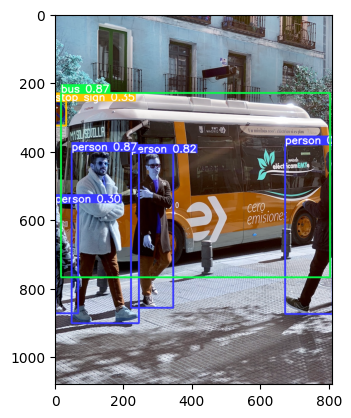

In [3]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs
    
    img = result.orig_img
    
    res = model(img)
    res_plotted = res[0].plot()
    plt.imshow(res_plotted)
    plt.show()
    

## Train on custiom data (detecting Orlen's Logo)
Ultralytics documentation: https://docs.ultralytics.com/

In [11]:
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights
results = model.train(data='config.yaml', epochs=5)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [12]:
results = model('custom_data/images/train/1.jpg')


image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\images\train\1.jpg: 448x640 (no detections), 241.9ms
Speed: 3.1ms preprocess, 241.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [20]:
# def plot_results(results):
#     for result in results:
#         boxes = result.boxes  # Boxes object for bbox outputs
#         masks = result.masks  # Masks object for segmentation masks outputs
#         probs = result.probs  # Class probabilities for classification outputs
        
#         img = result.orig_img
        
#         res = model(img)
#         res_plotted = res[0].plot()
#         plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
#         plt.axis(False)
#         plt.show()

from scripts import utils
        

In [21]:
results = model('custom_data/images/train/3.png')
utils.plot_results(results=results, model=model)


image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\images\train\3.png: 448x640 (no detections), 233.2ms
Speed: 26.9ms preprocess, 233.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


TypeError: plot_results() missing 1 required positional argument: 'model'


0: 448x640 (no detections), 214.3ms
Speed: 3.0ms preprocess, 214.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


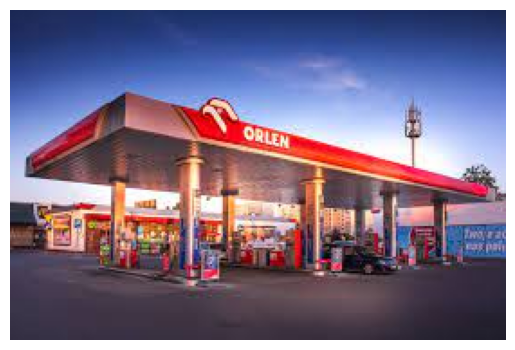

In [15]:
plot_results(results)

In [16]:
type(model)

ultralytics.yolo.engine.model.YOLO

In [18]:
type(results[0])

ultralytics.yolo.engine.results.Results